In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from hydramuscle.model.shell import Shell
from hydramuscle.model.layer import Layer
from hydramuscle.model.smc import SMC

DT = 0.02
TIME_SEQ = [0.02, 0.08, 25, 45]

In [2]:
def plot_conn_ratios(filename, label, savepath, sparsity):
    
    # Read the simulation results
    calcium = pd.read_hdf("../results/data/calcium/" + filename + ".h5")
    calcium = calcium.values.reshape(len(calcium), 60, 60)
    calcium.shape
    
    # Separate ectoderm and endoderm
    calcium_ecto = calcium[:, :30, :]
    calcium_endo = calcium[:, 30:, :]
    
    # Get the connectivity map
    layer = Layer(SMC(T=300, dt=0.0002), gip3x=0.05, gip3y=3, numx=30, numy=60)
    shell = Shell(layer, layer, sparsity=sparsity, seed=1112)
    pattern1 = shell.cross_layer_pattern.reshape(30, 60)
    
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(1, 3, 1)
    ax.imshow(np.flip(pattern1.T, 0))
    ax.set_xticks([])
    ax.set_yticks([])
    fontdict = {'fontsize': 15}
    ax.set_title('density=' + str(sparsity), fontdict=fontdict)
    ax.text(-0.1, 1.05, label, size=30, weight="bold", transform=ax.transAxes)

    for j, moment in enumerate(TIME_SEQ):
        ax = fig.add_subplot(2, 2+len(TIME_SEQ), j+1+2)
        im = ax.imshow(np.flip(calcium_ecto[int(moment / DT)].T, 0), cmap='hot', vmin=0, vmax=1)
        ax.text(1, 8, str(moment) + 's', color='white', fontsize=15)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.patch.set_edgecolor('forestgreen')  
        ax.patch.set_alpha(1)
        ax.patch.set_linewidth('13')  

        ax = fig.add_subplot(2, 2+len(TIME_SEQ), j+1+len(TIME_SEQ)+2+2)
        ax.imshow(np.flip(calcium_endo[int(moment / DT)].T, 0), cmap='hot', vmin=0, vmax=1)
        ax.text(1, 8, str(moment) + 's', color='white', fontsize=15)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.patch.set_edgecolor('r')
        ax.patch.set_alpha(1)  
        ax.patch.set_linewidth('13')  
    
    cax = fig.add_axes([0.92, 0.12, 0.01, 0.76])
    cb = plt.colorbar(im, cax=cax)
    cb.set_label('[Ca$^{2+}$]($\mu$M)', fontsize=15)
    cb.ax.tick_params(labelsize=15)
    plt.subplots_adjust(hspace=0.1)
    plt.savefig(savepath, bbox_inches='tight')
    plt.show()

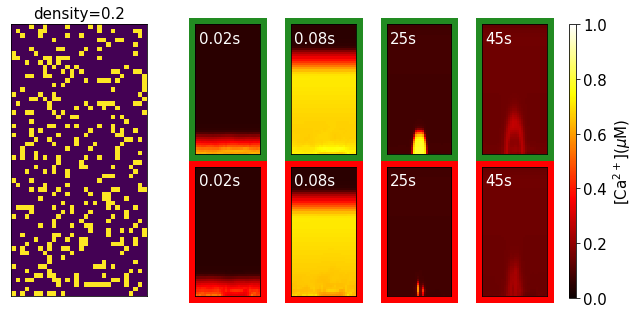

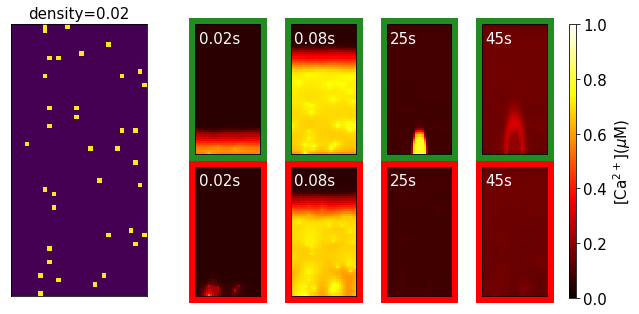

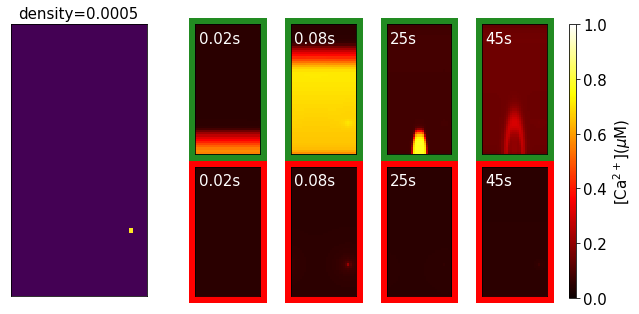

In [3]:
plot_conn_ratios("2020-09-30-23-45-27-057041", '', "../results/figures/connectivity-ratio-a.png", 0.2)
plot_conn_ratios("2020-09-30-23-45-18-961725", '', "../results/figures/connectivity-ratio-b.png", 0.02)
plot_conn_ratios("2020-09-30-23-45-27-809032", '', "../results/figures/connectivity-ratio-c.png", 0.0005)